# Лабораторна робота номер 6
### ФБ-24 Довгаль Анна

#### Завдання 1
1. Згенеруйте двовимірні дані (xx, yy) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (yy = kk + bb) для подальшого аналізу
результатів.

In [110]:
import numpy as np
import matplotlib.pyplot as plt

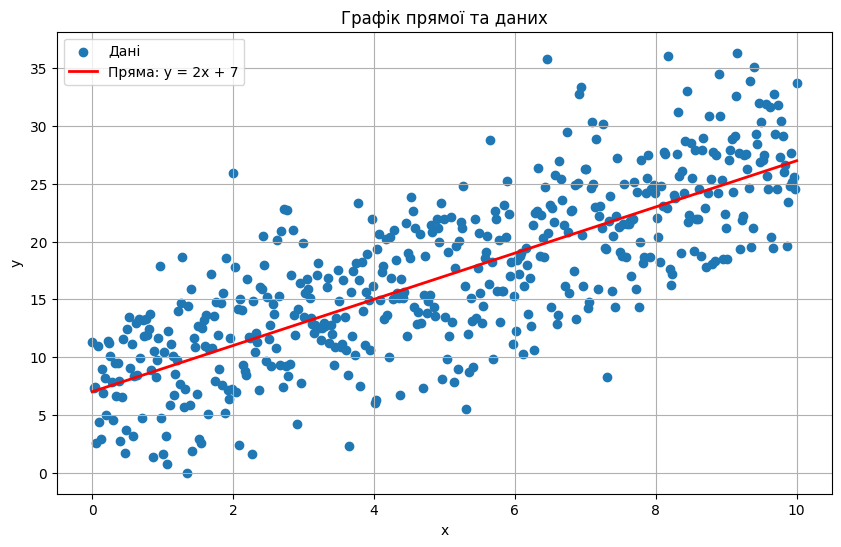

In [111]:
k = 2
b = 7

n = 500
x = np.linspace(0, 10, n)

noise = np.random.normal(0, 5, n)
y = k*x + b + noise

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік прямої та даних')
plt.legend()
plt.grid(True)
plt.show()

2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k та b.

In [112]:
def least_squares(x, y):

    b1 = ((x*y).mean() - x.mean()*y.mean())/((x*x).mean() - (x.mean())**2)
    b0 = y.mean() - b1*x.mean()

    return b1, b0

ks, bs = least_squares(x, y)
print(f"Оригінальне k = {k}, b = {b}")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)

Оригінальне k = 2, b = 7
Отримане значення k:  2.001750805360632
Отримане значення b:  7.194932877937877


3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).

In [113]:
kp, bp = np.polyfit(x,y,1)
print(f"Оригінальне k = {k}, b = {b}")
print("Значення отримані за допомогою np.polyfit(x,y,1):")
print("Отримане значення k: ", kp)
print("Отримане значення b: ", bp)
print()
kpx = abs(kp-k)
bpx = abs(bp-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", kpx)
print("Похибка значень b: ", bpx)
print()
print("Значення отримані за допомогою методу найменших квадратів:")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)
print()
ksx = abs(ks-k)
bsx = abs(bs-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", ksx)
print("Похибка значень b: ", bsx)

Оригінальне k = 2, b = 7
Значення отримані за допомогою np.polyfit(x,y,1):
Отримане значення k:  2.001750805360631
Отримане значення b:  7.19493287793788

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.0017508053606309915
Похибка значень b:  0.19493287793788028

Значення отримані за допомогою методу найменших квадратів:
Отримане значення k:  2.001750805360632
Отримане значення b:  7.194932877937877

Абсолютні похибки відносно істинних значень:
Похибка значень k:  0.0017508053606318796
Похибка значень b:  0.19493287793787673


4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

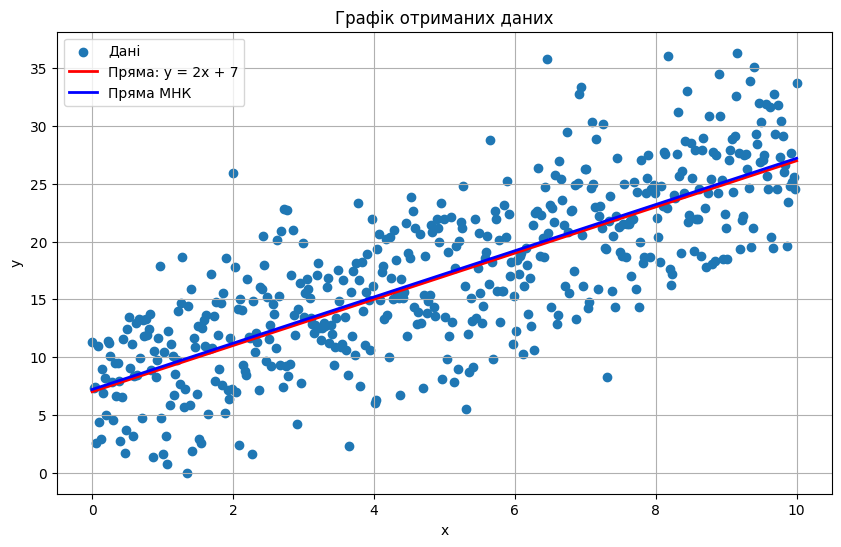

In [114]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.plot(x, ks * x + bs, color='blue', linestyle='-', linewidth=2, label='Пряма МНК')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік отриманих даних')
plt.legend()
plt.grid(True)
plt.show()

#### Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k та b. Визначіть оптимальні вхідні параметри: learning_rate, n_iter

In [132]:
Niter = 600 

learn_rate = 0.01


def gradient_descent(x, y, lr, Niter):
    kk = 0
    bb = 0
    
    for i in range(Niter):

        yi = bb + kk*x

        dk = (-2) * (x*(y - yi)).mean()
        db = (-2) * (y - yi).mean()

        kk = kk - lr * dk
        bb = bb - lr * db

    return kk, bb
    
kk, bb = gradient_descent(x, y, learn_rate, Niter)
print(kk, bb)

2.055014821825835 6.84209573911907


In [163]:
Niter = 5000

learn_rate1 = 0.01

def gradient_descent2(x, y, lr1, lr2, Niter):
    kk = 0
    bb = 0
    for i in range(Niter):

        yi = bb + kk*x

        dk = (-2) * (x*(y - yi)).mean()
        db = (-2) * (y - yi).mean()

        kk = kk - lr1 * dk
        bb = bb - lr2 * db

        

    return kk, bb
    
q = 1 
for i in range(1, 15):
    for j in range(1, 100):
        lr = j**(-i)
        z, v = gradient_descent2(x, y, learn_rate1, lr, Niter)
        print("Крок2: ", lr, " b: ", v)
        if q > abs(b-v):
            q = abs(b-v)
            l, r, m = lr, i, j


kd, bd = gradient_descent2(x, y, learn_rate1, l, Niter)
print(f"\nНайкращий крок {l}={m}^(-{r}) b = {bd}")
print("Різниця з значенням з одним learning rate: ", abs(bd-bb))


c:\Users\Aya\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:181: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
C:\Temp\ipykernel_14036\1748091437.py:10: RuntimeWarning: invalid value encountered in multiply
  yi = bb + kk*x


Крок2:  1.0  b:  nan
Крок2:  0.5  b:  7.194932877937885
Крок2:  0.3333333333333333  b:  7.194932877937887
Крок2:  0.25  b:  7.194932877937887
Крок2:  0.2  b:  7.1949328779378705
Крок2:  0.16666666666666666  b:  7.194932877937868
Крок2:  0.14285714285714285  b:  7.194932877937868
Крок2:  0.125  b:  7.194932877937868
Крок2:  0.1111111111111111  b:  7.194932877937868
Крок2:  0.1  b:  7.194932877937868
Крок2:  0.09090909090909091  b:  7.194932877937867
Крок2:  0.08333333333333333  b:  7.194932877937867
Крок2:  0.07692307692307693  b:  7.194932877937864
Крок2:  0.07142857142857142  b:  7.194932877937862
Крок2:  0.06666666666666667  b:  7.194932877937862
Крок2:  0.0625  b:  7.194932877937859
Крок2:  0.058823529411764705  b:  7.194932877937859
Крок2:  0.05555555555555555  b:  7.194932877937859
Крок2:  0.05263157894736842  b:  7.194932877937856
Крок2:  0.05  b:  7.194932877937856
Крок2:  0.047619047619047616  b:  7.194932877937856
Крок2:  0.045454545454545456  b:  7.194932877937855
Крок2:  0.0

2. Додайте отриману лінію регресії на загальний графік

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Дані')
plt.plot(x, k * x + b, color='red', linestyle='-', linewidth=2, label='Пряма: y = {}x + {}'.format(k, b))
plt.plot(x, kk * x + bb, color='yellow', linestyle='-', linewidth=2, label='Пряма методу градієнтного спуску')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графік отриманих даних')
plt.legend()
plt.grid(True)
plt.show()

3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки

In [ ]:
def E(x, y, kk, bb):
    yi = bb + kk*x
    return ((y - yi)**2).mean()

iter = 1000

def gradient_descent(x, y, lr, Niter):
    kk = 0
    bb = 0
    e = []
    for i in range(Niter):

        yi = bb + kk*x

        dk = (-2) * (x*(y - yi)).mean()
        db = (-2) * (y - yi).mean()


        kk = kk - lr * dk
        bb = bb - lr * db

        e.append(E(x, y, kk, bb))

    return kk, bb, e
    
err = gradient_descent(x, y, learn_rate, iter)[2]

plt.figure(figsize=(10, 6))
plt.plot(range(iter), err, color='purple', linestyle='-', linewidth=2)
plt.xlabel('Ітерації')
plt.ylabel('Помилка')
plt.title('Графік середньоквадратичної помилки (MSE)')
plt.grid(True)
plt.show()

4. Порівняйте отримані результати з результатами попереднього завдання

In [ ]:
print(f"Оригінальне k = {k}, b = {b}")

print("Значення отримані за допомогою  методу градієнтного спуску:")
print("Отримане значення k: ", kk)
print("Отримане значення b: ", bb)
print()
kkx = abs(kk-k)
bkx = abs(bb-b)
print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", kkx)
print("Похибка значень b: ", bkx)
print()

print("Значення отримані за допомогою методу найменших квадратів:")
print("Отримане значення k: ", ks)
print("Отримане значення b: ", bs)
print()

print("Абсолютні похибки відносно істинних значень:")
print("Похибка значень k: ", ksx)
print("Похибка значень b: ", bsx)